# Problem Statement: Airbnb Hotel Booking Analysis

The hospitality industry has undergone a significant transformation with the rise of online platforms facilitating short-term lodging and tourism.
 Leading this revolution is Airbnb, Inc., a pioneering American company that has reshaped travel accommodation through its innovative online marketplace.
  Established in 2008 in San Francisco, California, Airbnb provides a diverse range of lodging options, offering guests a unique and personalized experience.
This project aims to analyze Airbnb booking data to uncover key insights into booking patterns, pricing strategies,
 guest preferences, and host performance. By leveraging data analysis techniques, we will identify trends and relationships that can provide valuable information for hosts,
  guests, and the Airbnb platform itself.
  

Import Libraries and Load Data

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
import pandas as pd

# Use pd.read_excel() for .xlsx files
df = pd.read_excel('1730285881-Airbnb_Open_Data.xlsx')



In [5]:
# Display the first few rows of the dataframe
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


Data Cleaning and Preprocessing

In [6]:
# --- Data Cleaning ---

# Standardize column names (lowercase and replace spaces with underscores)
df.columns = df.columns.str.lower().str.replace(' ', '_')

# This is the problematic line because 'price' and 'service_fee' are already numeric
# df['price'] = df['price'].str.replace('$', '').str.replace(',', '').astype(float)
# df['service_fee'] = df['service_fee'].str.replace('$', '').str.replace(',', '').astype(float)

# THE FIX: Simply ensure the columns are of type float.
# This might not even be necessary if they are already floats or integers.
df['price'] = df['price'].astype(float)
df['service_fee'] = df['service_fee'].astype(float)


# Handle missing values
for col in ['review_rate_number', 'reviews_per_month', 'minimum_nights']:
    df[col].fillna(df[col].median(), inplace=True)

# Display data info to confirm changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   name                            102329 non-null  object        
 2   host_id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host_name                       102191 non-null  object        
 5   neighbourhood_group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country_code                    102468 non-null  object 

C:\Users\DELL\AppData\Local\Temp\ipykernel_21052\1902426856.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_21052\1902426856.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

Exploratory Data Analysis (EDA) - Summary
# EXPLORATORY DATA ANALYSIS (EDA)

Exploratory Data Analysis (EDA) is a vital phase in data analysis, involving the examination and visualization of data to uncover patterns, trends, and insights. Through techniques such as summary statistics and data visualization, EDA sets the stage for further investigation.

Summary Statistics

In [7]:
# Display summary statistics for numerical columns
df.describe()

,id,host_id,lat,long,instant_bookable,construction_year,price,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365
count,1.025990e+05,1.025990e+05,102591.000000,102591.000000,102494.000000,102385.000000,102352.000000,102326.000000,102599.000000,102416.000000,86706,102599.000000,102599.000000,102280.000000,102151.000000
mean,2.914623e+07,4.925411e+10,40.728094,-73.949644,0.497785,2012.487464,625.293536,125.026924,8.115371,27.483743,2019-06-12 03:40:52.065601024,1.275896,3.278219,7.936605,141.133254
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,0.000000,2003.000000,50.000000,10.000000,-1223.000000,0.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,1.508581e+07,2.458333e+10,40.688740,-73.982580,0.000000,2007.000000,340.000000,68.000000,2.000000,1.000000,2018-10-28 00:00:00,0.280000,2.000000,1.000000,3.000000
50%,2.913660e+07,4.911774e+10,40.722290,-73.954440,0.000000,2012.000000,624.000000,125.000000,3.000000,7.000000,2019-06-14 00:00:00,0.740000,3.000000,1.000000,96.000000
75%,4.320120e+07,7.399650e+10,40.762760,-73.932350,1.000000,2017.000000,913.000000,183.000000,5.000000,30.000000,2019-07-05 00:00:00,1.710000,4.000000,2.000000,269.000000
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,1.000000,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,2058-06-16 00:00:00,90.000000,5.000000,332.000000,3677.000000
std,1.625751e+07,2.853900e+10,0.055857,0.049521,0.499998,5.765556,331.671614,66.325739,30.494537,49.508954,NaN,1.622073,1.282711,32.218780,135.435024


What are the different property types in the Dataset?

                 count
room_type             
Entire home/apt  53701
Private room     46556
Shared room       2226
Hotel room         116


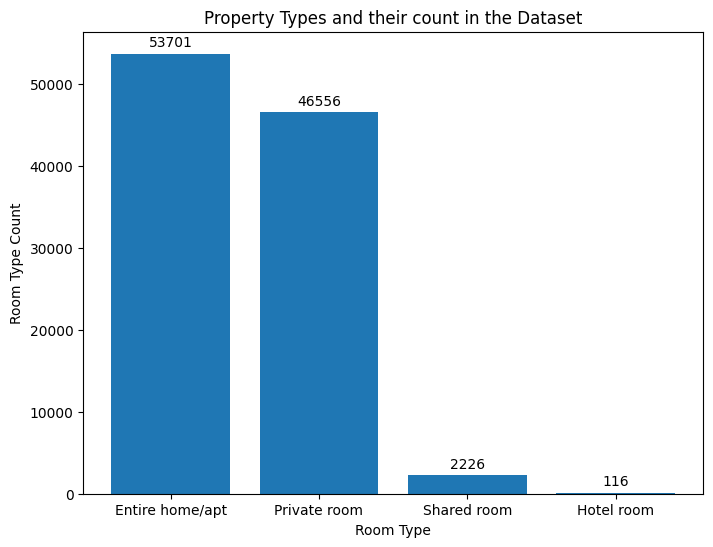

In [8]:
# What are the different property types in the Dataset?
property_types = df['room_type'].value_counts().to_frame()
print(property_types)

# Room type count plotted on a barchart
plt.figure(figsize=(8, 6))
room_type_bar = plt.bar(property_types.index, property_types['count'])

plt.bar_label(room_type_bar, labels=property_types['count'], padding=3)
plt.xlabel('Room Type')
plt.ylabel('Room Type Count')
plt.title('Property Types and their count in the Dataset')
plt.show()

Which Neighborhood Group has the highest number of Listings?

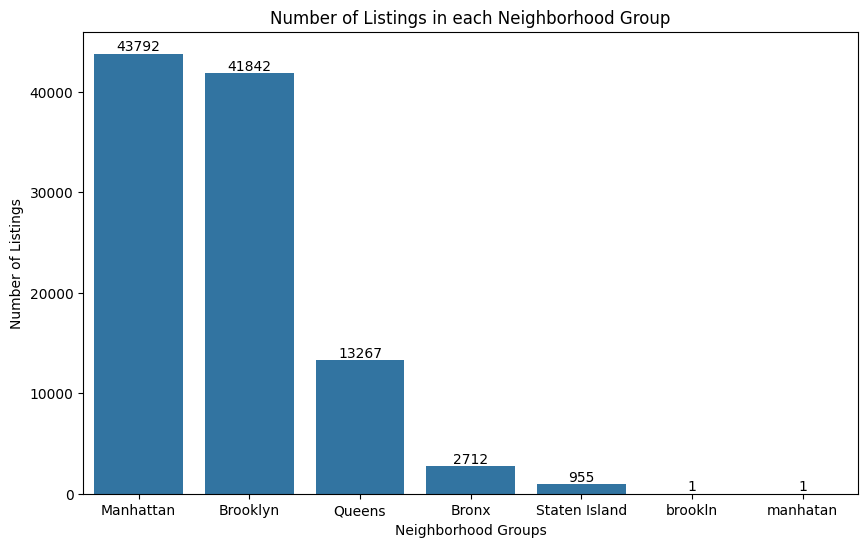

In [9]:
# Which Neighborhood Group has the highest number of Listings?
plt.figure(figsize=(10, 6))
neighbourhood_bar = sns.countplot(data=df, x='neighbourhood_group', order=df['neighbourhood_group'].value_counts().index)

for container in neighbourhood_bar.containers:
    neighbourhood_bar.bar_label(container)

plt.xlabel('Neighborhood Groups')
plt.ylabel('Number of Listings')
plt.title('Number of Listings in each Neighborhood Group')
plt.show()

Which neighborhood groups have the highest average prices?

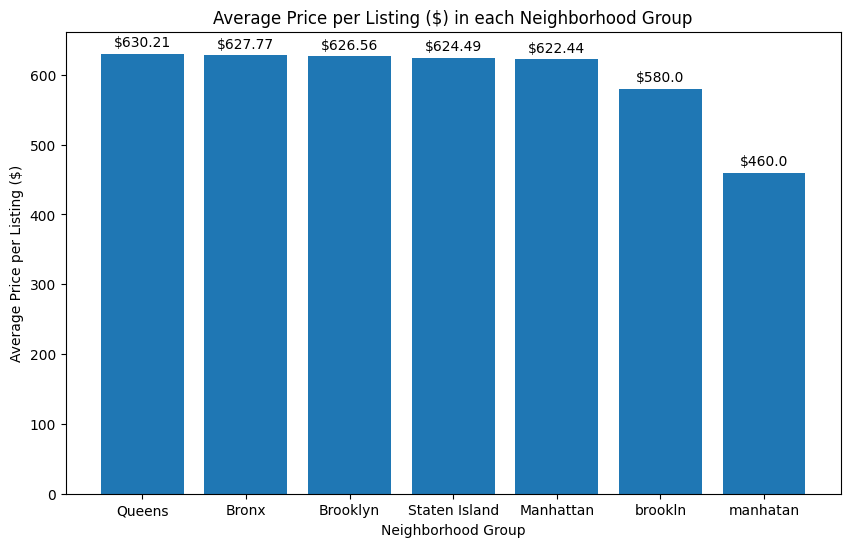

In [10]:
# Which neighborhood groups have the highest average prices for Airbnb listings?
avg_price = df.groupby('neighbourhood_group')['price'].mean().sort_values(ascending=False).to_frame()

plt.figure(figsize=(10, 6))
avg_price_bar = plt.bar(avg_price.index, avg_price['price'])

plt.bar_label(avg_price_bar, labels=[f'${round(p, 2)}' for p in avg_price['price']], padding=3)
plt.xlabel('Neighborhood Group')
plt.ylabel('Average Price per Listing ($)')
plt.title('Average Price per Listing ($) in each Neighborhood Group')
plt.show()

 Is there a relationship between construction year and price?

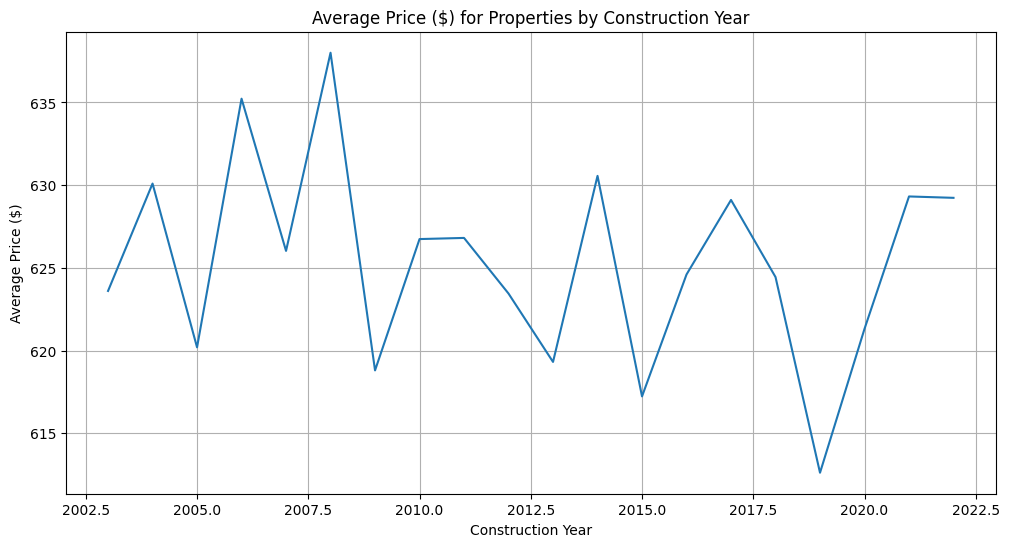

In [11]:
# Is there a relationship between the construction year of a property and its price?
plt.figure(figsize=(12, 6))
df.groupby('construction_year')['price'].mean().plot()

plt.xlabel('Construction Year')
plt.ylabel('Average Price ($)')
plt.title('Average Price ($) for Properties by Construction Year')
plt.grid(True)
plt.show()

 Who are the top 10 hosts by listing count?

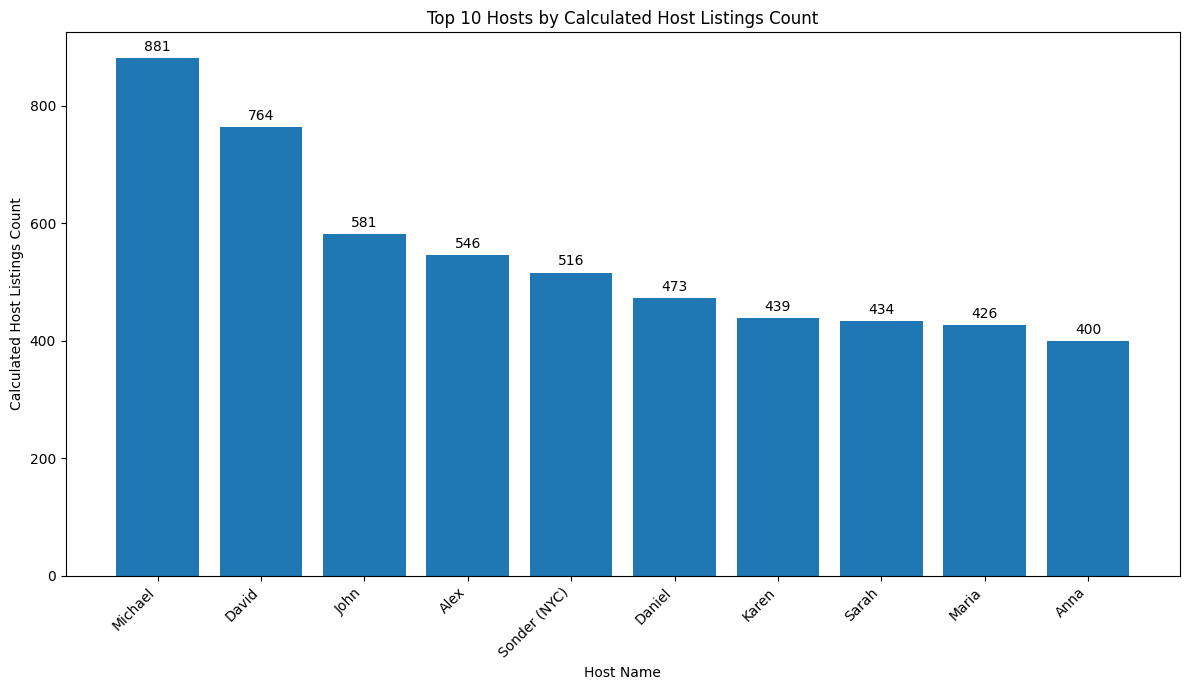

In [12]:
# Who are the top 10 hosts by calculated host listing count?
hosts = df['host_name'].value_counts().nlargest(10).to_frame()

plt.figure(figsize=(12, 7))
hosts_bar = plt.bar(hosts.index, hosts['count'])

plt.bar_label(hosts_bar, labels=hosts['count'], padding=3)
plt.xlabel('Host Name')
plt.ylabel('Calculated Host Listings Count')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Hosts by Calculated Host Listings Count')
plt.tight_layout()
plt.show()

Are verified hosts more likely to receive positive reviews?

                        review_rate_number
host_identity_verified                    
verified                          3.285893
unconfirmed                       3.270859


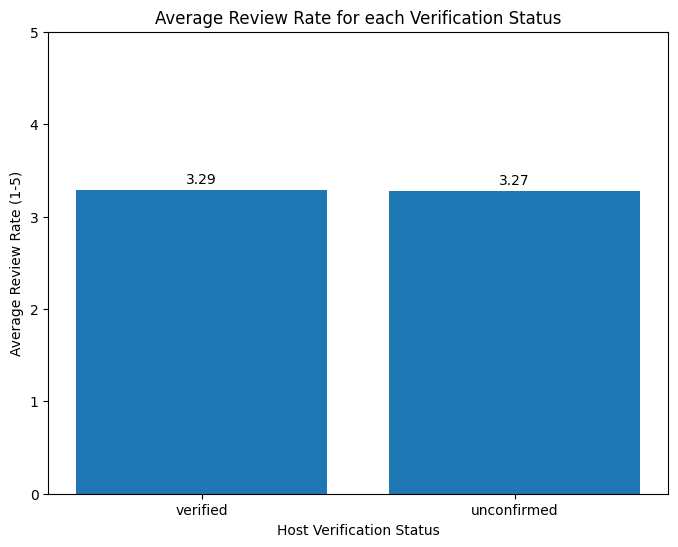

In [13]:
# Are hosts with verified identities more likely to receive positive reviews?
review = df.groupby('host_identity_verified')['review_rate_number'].mean().sort_values(ascending=False).to_frame()
print(review)

plt.figure(figsize=(8, 6))
review_bar = plt.bar(review.index, review['review_rate_number'])

plt.bar_label(review_bar, labels=[round(r, 2) for r in review['review_rate_number']], padding=3)
plt.ylim([0, 5])
plt.xlabel('Host Verification Status')
plt.ylabel('Average Review Rate (1-5)')
plt.title('Average Review Rate for each Verification Status')
plt.show()

Is there a correlation between the price and service fee?

The Pearson correlation coefficient is: 0.9999908755543332


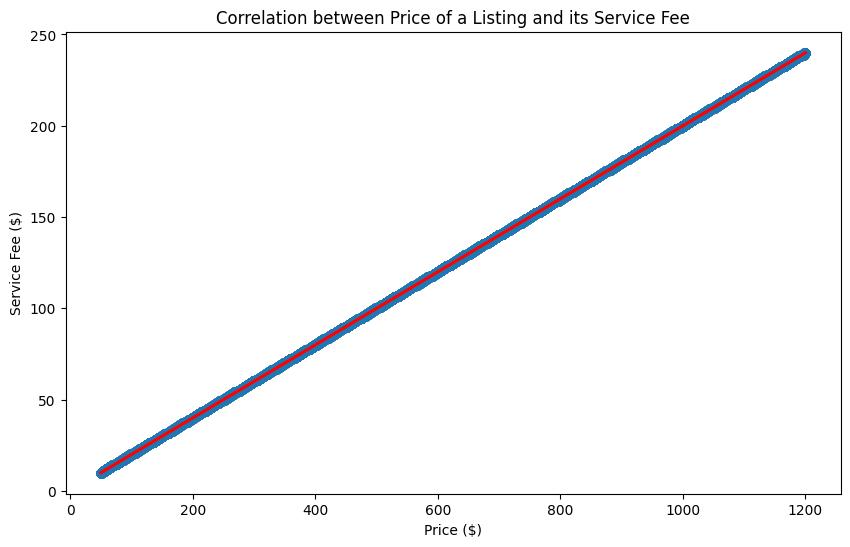

In [14]:
# Is there a correlation between the price of a listing and its service fee?
correlation = df['price'].corr(df['service_fee'])
print(f"The Pearson correlation coefficient is: {correlation}")

plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='price', y='service_fee', line_kws={"color": "red"})
plt.xlabel('Price ($)')
plt.ylabel('Service Fee ($)')
plt.title('Correlation between Price of a Listing and its Service Fee')
plt.show()

How does the average review rate vary by neighborhood and room type?

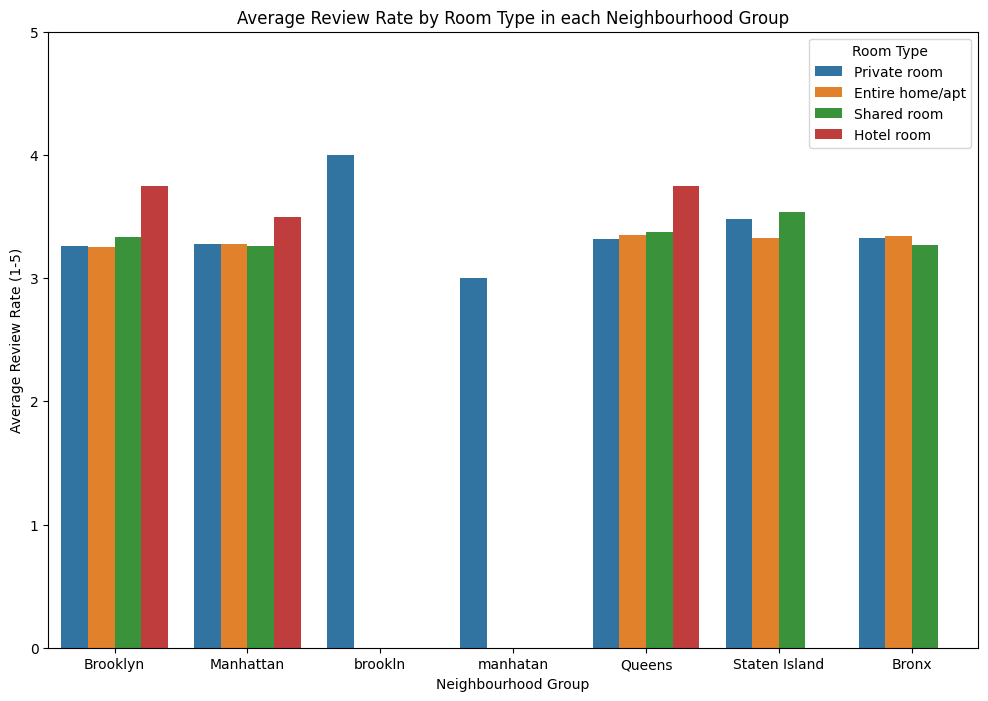

In [15]:
# What is the average review rate, and does it vary based on neighborhood group and room type?
plt.figure(figsize=(12, 8))
sns.barplot(data=df, x='neighbourhood_group', y='review_rate_number', hue='room_type', errorbar=None)

plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Review Rate (1-5)')
plt.title('Average Review Rate by Room Type in each Neighbourhood Group')
plt.legend(title='Room Type')
plt.ylim(0, 5)
plt.show()

Is there a relationship between listing count and availability?

The Pearson correlation coefficient is: 0.15919424228130613


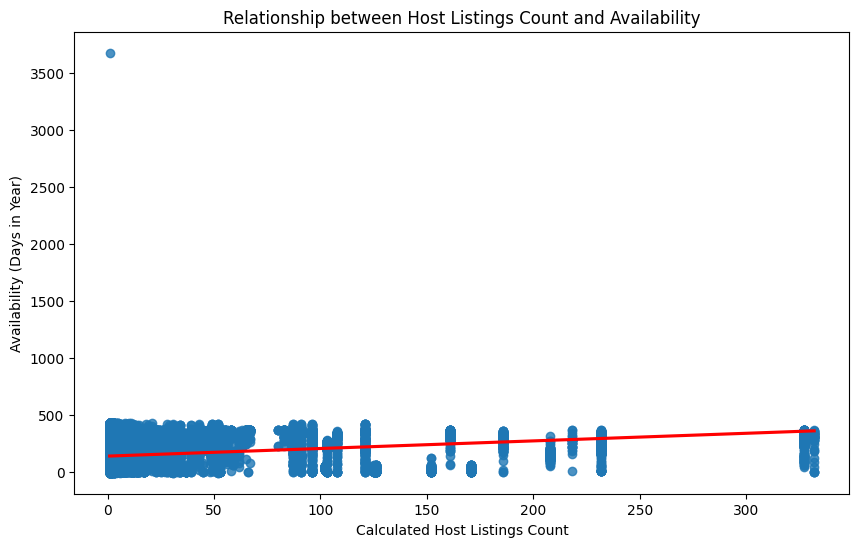

In [16]:
# Are hosts with a higher listing count more likely to have higher availability?
correlation_avail = df['calculated_host_listings_count'].corr(df['availability_365'])
print(f"The Pearson correlation coefficient is: {correlation_avail}")

plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='calculated_host_listings_count', y='availability_365', line_kws={"color": "red"})
plt.xlabel('Calculated Host Listings Count')
plt.ylabel('Availability (Days in Year)')
plt.title('Relationship between Host Listings Count and Availability')
plt.show()

 Conclusion

# Conclusion

This project provided a comprehensive analysis of the New York City Airbnb dataset. Key findings include:

* **Listing Distribution:** 'Entire home/apt' is the most common room type. Listing counts vary significantly across neighborhood groups, with Manhattan and Brooklyn being the most popular.
* **Pricing Dynamics:** A strong positive correlation (0.99) exists between the listing price and the service fee. Average prices differ across neighborhood groups, and there appears to be a slight downward trend in the price of properties built in more recent years.
* **Host and Review Analysis:** Host verification status does not seem to have a significant impact on the average review rate. Review rates are fairly consistent across different room types and neighborhoods, generally hovering around a rating of 3 out of 5.

Further analysis could involve sentiment analysis of text reviews and predictive modeling to forecast demand and optimal pricing.